In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.svm import SVC


# Import our input dataset
loans_df = pd.read_csv('Resources/charity_data.csv')
loans_df.head()
#target = IS_SUCCESSFULL

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()
# we can see that NAME, APPLICATION_TYPE, CLASSIFICATION will all be issues
# remove name as it is not relevant
# check and see if we can use bin for CLASSIFICATION and APPLICATION_TYPE


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [3]:
# Check the unique value counts to see if binning is required
class_df = loans_df.APPLICATION_TYPE.value_counts()
class_df.head()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
Name: APPLICATION_TYPE, dtype: int64

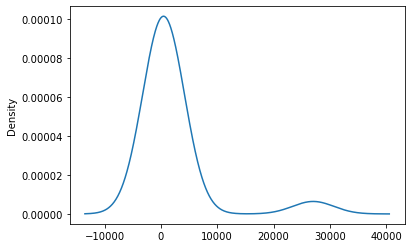

In [4]:
# Visualize the value counts
class_df.plot.density()

In [5]:
# Determine which values to replace
replace_app = list(class_df[class_df < 1000].index)
replace_app

['T8',
 'T7',
 'T10',
 'T9',
 'T13',
 'T12',
 'T2',
 'T25',
 'T14',
 'T29',
 'T15',
 'T17']

In [6]:
#binning any category with under 1k counts
for APPLICATION_TYPE in replace_app:
    loans_df.APPLICATION_TYPE = loans_df.APPLICATION_TYPE.replace(APPLICATION_TYPE,"OTHER") 
# Check to make sure binning was successful
loans_df.APPLICATION_TYPE.value_counts()

T3       27037
OTHER     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [7]:
loans_df.tail(60)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34239,990250197,AMERICAN FEDERATION OF LABOR AND CONGRESS OF I...,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34240,990250943,SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,0
34241,990261871,HABITAT FOR HUMANITY INTERNATIONAL INC,T3,CompanySponsored,C1000,Preservation,Trust,1,25000-99999,N,1587617,0
34242,990269016,AMERICAN ORGANIZATION OF NURSE EXECUTIVES,T6,Independent,C1000,ProductDev,Trust,1,100000-499999,N,19591,1
34243,990274402,PTA HAWAII CONGRESS,T3,Independent,C1000,Preservation,Association,1,0,N,5000,0
34244,990275466,HABITAT FOR HUMANITY INTERNATIONAL,T3,CompanySponsored,C1000,Preservation,Trust,1,100000-499999,N,649597,0
34245,990278511,MANANA SCHOOL CHORUS,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,0
34246,990280498,FAMILY PROGRAMS HAWAII,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,1354228,1
34247,990292449,LITTLE LEAGUE BASEBALL INC,T3,CompanySponsored,C1000,Preservation,Association,1,100000-499999,N,17010,0
34248,990296228,SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,0


In [8]:
# Check the unique value counts to see if binning is required
class_df = loans_df.CLASSIFICATION.value_counts()
class_df.head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Determine which values to replace
replace_class = list(class_df[class_df < 1000].index)
replace_class

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C2300',
 'C7200',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1278',
 'C1238',
 'C1235',
 'C1237',
 'C7210',
 'C4100',
 'C2400',
 'C1720',
 'C1600',
 'C1257',
 'C0',
 'C2710',
 'C1260',
 'C1246',
 'C1267',
 'C3200',
 'C1234',
 'C1256',
 'C4500',
 'C1580',
 'C4120',
 'C2150',
 'C4200',
 'C2500',
 'C1570',
 'C2561',
 'C2170',
 'C2600',
 'C1248',
 'C1900',
 'C1728',
 'C3700',
 'C2570',
 'C6100',
 'C5200',
 'C1236',
 'C1283',
 'C1245',
 'C1732',
 'C8210',
 'C1820',
 'C2380',
 'C1370',
 'C2190']

In [10]:
# Bin Class under 1k instances
for CLASSIFICATION in replace_class:
    loans_df.CLASSIFICATION = loans_df.CLASSIFICATION.replace(CLASSIFICATION,"OTHER") 
# Check to make sure binning was successful
loans_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
OTHER     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
#EIN AND NAME should have no bearing on the data. removing it here
loans_df = loans_df.drop(columns= ["EIN", "NAME"])

In [12]:
# have to remove NAME from loans_cat as it was removed from DF earlier
loans_cat.remove('NAME')

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
loans_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [15]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
loans_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_OTHER',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_OTHER', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
 

In [17]:
# Split our preprocessed data into our features and target arrays
y = loans_df["IS_SUCCESSFUL"].values
X = loans_df.drop(["IS_SUCCESSFUL"],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
len(X_train_scaled[0])

40

In [20]:
# Define the model - deep neural net
#inputs = 40
#layer one = 80 (2x inputs)
#layer two = 12
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 0s 590us/step - loss: 0.5767 - accuracy: 0.7177
Epoch 2/50
804/804 [==============================] - 0s 580us/step - loss: 0.5599 - accuracy: 0.7298
Epoch 3/50
804/804 [==============================] - 0s 581us/step - loss: 0.5566 - accuracy: 0.7311
Epoch 4/50
804/804 [==============================] - 0s 582us/step - loss: 0.5550 - accuracy: 0.7315
Epoch 5/50
804/804 [==============================] - 0s 582us/step - loss: 0.5538 - accuracy: 0.7330
Epoch 6/50
804/804 [==============================] - 0s 595us/step - loss: 0.5526 - accuracy: 0.7330
Epoch 7/50
804/804 [==============================] - 0s 589us/step - loss: 0.5515 - accuracy: 0.7336
Epoch 8/50
804/804 [==============================] - 0s 587us/step - loss: 0.5511 - accuracy: 0.7336
Epoch 9/50
804/804 [==============================] - 0s 586us/step - loss: 0.5509 - accuracy: 0.7334
Epoch 10/50
804/804 [==============================] - 0s 587us/step - loss: 0.550

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5578 - accuracy: 0.7257
Loss: 0.5577995777130127, Accuracy: 0.7257142663002014


# accuracy of only 72.57%. The challenge aims for 75%+

In [22]:
# Define the model - deep neural net
#increase layer one to 120

#inputs = 40
#layer one = 120 (3x inputs)
#layer two = 12
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  120
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)



Epoch 1/50
804/804 [==============================] - 1s 669us/step - loss: 0.5708 - accuracy: 0.7229
Epoch 2/50
804/804 [==============================] - 1s 666us/step - loss: 0.5583 - accuracy: 0.7296
Epoch 3/50
804/804 [==============================] - 1s 670us/step - loss: 0.5566 - accuracy: 0.7307
Epoch 4/50
804/804 [==============================] - 1s 666us/step - loss: 0.5548 - accuracy: 0.7327
Epoch 5/50
804/804 [==============================] - 1s 668us/step - loss: 0.5538 - accuracy: 0.7342
Epoch 6/50
804/804 [==============================] - 1s 665us/step - loss: 0.5525 - accuracy: 0.7324
Epoch 7/50
804/804 [==============================] - 1s 666us/step - loss: 0.5518 - accuracy: 0.7334
Epoch 8/50
804/804 [==============================] - 1s 676us/step - loss: 0.5510 - accuracy: 0.7334
Epoch 9/50
804/804 [==============================] - 1s 683us/step - loss: 0.5508 - accuracy: 0.7343
Epoch 10/50
804/804 [==============================] - 1s 670us/step - loss: 0.550

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5548 - accuracy: 0.7235
Loss: 0.5547859072685242, Accuracy: 0.723498523235321


# lowered it from 72.57% to 72.35% 

In [24]:
# changed epoche to 100 and changed the layer activations to sigmoid
# changed the first layer back to 80

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 649us/step - loss: 0.5985 - accuracy: 0.7045
Epoch 2/100
804/804 [==============================] - 1s 647us/step - loss: 0.5765 - accuracy: 0.7236
Epoch 3/100
804/804 [==============================] - 1s 646us/step - loss: 0.5707 - accuracy: 0.7266
Epoch 4/100
804/804 [==============================] - 1s 647us/step - loss: 0.5657 - accuracy: 0.7294
Epoch 5/100
804/804 [==============================] - 1s 644us/step - loss: 0.5627 - accuracy: 0.7305
Epoch 6/100
804/804 [==============================] - 1s 638us/step - loss: 0.5601 - accuracy: 0.7317
Epoch 7/100
804/804 [==============================] - 1s 638us/step - loss: 0.5589 - accuracy: 0.7314
Epoch 8/100
804/804 [==============================] - 1s 635us/step - loss: 0.5576 - accuracy: 0.7310
Epoch 9/100
804/804 [==============================] - 1s 634us/step - loss: 0.5565 - accuracy: 0.7316
Epoch 10/100
804/804 [==============================] - 1s 635us/step - l

804/804 [==============================] - 1s 655us/step - loss: 0.5420 - accuracy: 0.7388
Epoch 80/100
804/804 [==============================] - 1s 657us/step - loss: 0.5421 - accuracy: 0.7376
Epoch 81/100
804/804 [==============================] - 1s 654us/step - loss: 0.5418 - accuracy: 0.7383
Epoch 82/100
804/804 [==============================] - 1s 656us/step - loss: 0.5418 - accuracy: 0.7384
Epoch 83/100
804/804 [==============================] - 1s 657us/step - loss: 0.5417 - accuracy: 0.7378
Epoch 84/100
804/804 [==============================] - 1s 655us/step - loss: 0.5419 - accuracy: 0.7383
Epoch 85/100
804/804 [==============================] - 1s 655us/step - loss: 0.5417 - accuracy: 0.7384
Epoch 86/100
804/804 [==============================] - 1s 654us/step - loss: 0.5417 - accuracy: 0.7388
Epoch 87/100
804/804 [==============================] - 1s 657us/step - loss: 0.5418 - accuracy: 0.7390
Epoch 88/100
804/804 [==============================] - 1s 682us/step - loss:

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5554 - accuracy: 0.7266
Loss: 0.5554373860359192, Accuracy: 0.7266472578048706


# still about the same, slightly better 72.66%

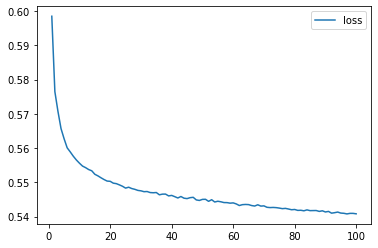

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

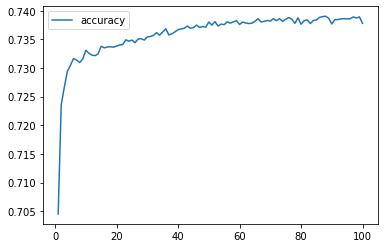

In [27]:
# Plot the loss
history_df.plot(y="accuracy")

In [28]:
#added another hidden layer. all layer and output sigmoid

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 1s 818us/step - loss: 0.6045 - accuracy: 0.6921
Epoch 2/100
804/804 [==============================] - 1s 685us/step - loss: 0.5777 - accuracy: 0.7234
Epoch 3/100
804/804 [==============================] - 1s 686us/step - loss: 0.5729 - accuracy: 0.7259
Epoch 4/100
804/804 [==============================] - 1s 708us/step - loss: 0.5676 - accuracy: 0.7281
Epoch 5/100
804/804 [==============================] - 1s 686us/step - loss: 0.5630 - accuracy: 0.7297
Epoch 6/100
804/804 [==============================] - 1s 683us/step - loss: 0.5610 - accuracy: 0.7295
Epoch 7/100
804/804 [==============================] - 1s 681us/step - loss: 0.5588 - accuracy: 0.7311
Epoch 8/100
804/804 [==============================] - 1s 695us/step - loss: 0.5575 - accuracy: 0.7307
Epoch 9/100
804/804 [==============================] - 1s 692us/step - loss: 0.5564 - accuracy: 0.7308
Epoch 10/100
804/804 [==============================] - 1s 685us/step - l

804/804 [==============================] - 1s 725us/step - loss: 0.5414 - accuracy: 0.7379
Epoch 80/100
804/804 [==============================] - 1s 710us/step - loss: 0.5416 - accuracy: 0.7381
Epoch 81/100
804/804 [==============================] - 1s 710us/step - loss: 0.5413 - accuracy: 0.7374
Epoch 82/100
804/804 [==============================] - 1s 712us/step - loss: 0.5414 - accuracy: 0.7387
Epoch 83/100
804/804 [==============================] - 1s 710us/step - loss: 0.5409 - accuracy: 0.7386
Epoch 84/100
804/804 [==============================] - 1s 715us/step - loss: 0.5411 - accuracy: 0.7394
Epoch 85/100
804/804 [==============================] - 1s 710us/step - loss: 0.5408 - accuracy: 0.7384
Epoch 86/100
804/804 [==============================] - 1s 708us/step - loss: 0.5410 - accuracy: 0.7393
Epoch 87/100
804/804 [==============================] - 1s 709us/step - loss: 0.5409 - accuracy: 0.7385
Epoch 88/100
804/804 [==============================] - 1s 712us/step - loss:

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5559 - accuracy: 0.7250
Loss: 0.5559002161026001, Accuracy: 0.7250145673751831


# accuracy a bit lower at 72.50%


In [30]:
#added another hidden layer

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30
hidden_nodes_layer4 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 754us/step - loss: 0.6037 - accuracy: 0.6929
Epoch 2/100
804/804 [==============================] - 1s 758us/step - loss: 0.5776 - accuracy: 0.7275
Epoch 3/100
804/804 [==============================] - 1s 756us/step - loss: 0.5737 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 1s 758us/step - loss: 0.5669 - accuracy: 0.7296
Epoch 5/100
804/804 [==============================] - 1s 759us/step - loss: 0.5640 - accuracy: 0.7298
Epoch 6/100
804/804 [==============================] - 1s 761us/step - loss: 0.5618 - accuracy: 0.7312
Epoch 7/100
804/804 [==============================] - 1s 755us/step - loss: 0.5607 - accuracy: 0.7312
Epoch 8/100
804/804 [==============================] - 1s 757us/step - loss: 0.5599 - accuracy: 0.7311
Epoch 9/100
804/804 [==============================] - 1s 758us/step - loss: 0.5589 - accuracy: 0.7321
Epoch 10/100
804/804 [==============================] - 1s 757us/step - l

804/804 [==============================] - 1s 759us/step - loss: 0.5419 - accuracy: 0.7388
Epoch 80/100
804/804 [==============================] - 1s 759us/step - loss: 0.5417 - accuracy: 0.7387
Epoch 81/100
804/804 [==============================] - 1s 763us/step - loss: 0.5417 - accuracy: 0.7384
Epoch 82/100
804/804 [==============================] - 1s 763us/step - loss: 0.5418 - accuracy: 0.7385
Epoch 83/100
804/804 [==============================] - 1s 758us/step - loss: 0.5414 - accuracy: 0.7381
Epoch 84/100
804/804 [==============================] - 1s 757us/step - loss: 0.5416 - accuracy: 0.7385
Epoch 85/100
804/804 [==============================] - 1s 759us/step - loss: 0.5412 - accuracy: 0.7388
Epoch 86/100
804/804 [==============================] - 1s 758us/step - loss: 0.5414 - accuracy: 0.7390
Epoch 87/100
804/804 [==============================] - 1s 763us/step - loss: 0.5414 - accuracy: 0.7390
Epoch 88/100
804/804 [==============================] - 1s 788us/step - loss:

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5562 - accuracy: 0.7265
Loss: 0.5562472939491272, Accuracy: 0.7265306115150452


In [32]:
#added another hidden layer and epochs to 300

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30
hidden_nodes_layer4 = 15
hidden_nodes_layer5 = 7



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))


# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))


# fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=300)

Epoch 1/300
804/804 [==============================] - 1s 788us/step - loss: 0.6311 - accuracy: 0.6549
Epoch 2/300
804/804 [==============================] - 1s 784us/step - loss: 0.5829 - accuracy: 0.7271
Epoch 3/300
804/804 [==============================] - 1s 791us/step - loss: 0.5783 - accuracy: 0.7313
Epoch 4/300
804/804 [==============================] - 1s 780us/step - loss: 0.5756 - accuracy: 0.7305
Epoch 5/300
804/804 [==============================] - 1s 789us/step - loss: 0.5732 - accuracy: 0.7319
Epoch 6/300
804/804 [==============================] - 1s 783us/step - loss: 0.5685 - accuracy: 0.7318
Epoch 7/300
804/804 [==============================] - 1s 786us/step - loss: 0.5635 - accuracy: 0.7313
Epoch 8/300
804/804 [==============================] - 1s 786us/step - loss: 0.5620 - accuracy: 0.7327
Epoch 9/300
804/804 [==============================] - 1s 791us/step - loss: 0.5607 - accuracy: 0.7329
Epoch 10/300
804/804 [==============================] - 1s 783us/step - l

804/804 [==============================] - 1s 804us/step - loss: 0.5422 - accuracy: 0.7381
Epoch 80/300
804/804 [==============================] - 1s 809us/step - loss: 0.5421 - accuracy: 0.7383
Epoch 81/300
804/804 [==============================] - 1s 805us/step - loss: 0.5417 - accuracy: 0.7392
Epoch 82/300
804/804 [==============================] - 1s 805us/step - loss: 0.5416 - accuracy: 0.7387
Epoch 83/300
804/804 [==============================] - 1s 802us/step - loss: 0.5416 - accuracy: 0.7394
Epoch 84/300
804/804 [==============================] - 1s 778us/step - loss: 0.5413 - accuracy: 0.7383
Epoch 85/300
804/804 [==============================] - 1s 780us/step - loss: 0.5417 - accuracy: 0.7395
Epoch 86/300
804/804 [==============================] - 1s 780us/step - loss: 0.5413 - accuracy: 0.7391
Epoch 87/300
804/804 [==============================] - 1s 780us/step - loss: 0.5417 - accuracy: 0.7391
Epoch 88/300
804/804 [==============================] - 1s 778us/step - loss:

804/804 [==============================] - 1s 855us/step - loss: 0.5379 - accuracy: 0.7407
Epoch 158/300
804/804 [==============================] - 1s 866us/step - loss: 0.5379 - accuracy: 0.7407
Epoch 159/300
804/804 [==============================] - 1s 856us/step - loss: 0.5380 - accuracy: 0.7416
Epoch 160/300
804/804 [==============================] - 1s 833us/step - loss: 0.5375 - accuracy: 0.7416
Epoch 161/300
804/804 [==============================] - 1s 871us/step - loss: 0.5377 - accuracy: 0.7413
Epoch 162/300
804/804 [==============================] - 1s 832us/step - loss: 0.5378 - accuracy: 0.7413
Epoch 163/300
804/804 [==============================] - 1s 867us/step - loss: 0.5377 - accuracy: 0.7413
Epoch 164/300
804/804 [==============================] - 1s 847us/step - loss: 0.5377 - accuracy: 0.7412
Epoch 165/300
804/804 [==============================] - 1s 835us/step - loss: 0.5373 - accuracy: 0.7412
Epoch 166/300
804/804 [==============================] - 1s 826us/ste

804/804 [==============================] - 1s 783us/step - loss: 0.5352 - accuracy: 0.7414
Epoch 236/300
804/804 [==============================] - 1s 786us/step - loss: 0.5356 - accuracy: 0.7418
Epoch 237/300
804/804 [==============================] - 1s 787us/step - loss: 0.5355 - accuracy: 0.7417
Epoch 238/300
804/804 [==============================] - 1s 781us/step - loss: 0.5353 - accuracy: 0.7414
Epoch 239/300
804/804 [==============================] - 1s 798us/step - loss: 0.5353 - accuracy: 0.7421
Epoch 240/300
804/804 [==============================] - 1s 794us/step - loss: 0.5353 - accuracy: 0.7418
Epoch 241/300
804/804 [==============================] - 1s 788us/step - loss: 0.5352 - accuracy: 0.7418
Epoch 242/300
804/804 [==============================] - 1s 803us/step - loss: 0.5354 - accuracy: 0.7414
Epoch 243/300
804/804 [==============================] - 1s 829us/step - loss: 0.5352 - accuracy: 0.7418
Epoch 244/300
804/804 [==============================] - 1s 819us/ste

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5676 - accuracy: 0.7258
Loss: 0.5675662755966187, Accuracy: 0.7258309125900269


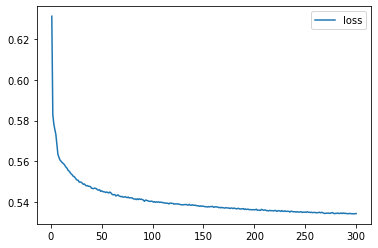

In [34]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

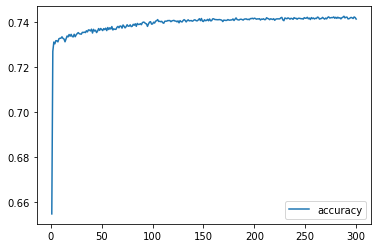

In [35]:
# Plot the loss
history_df.plot(y="accuracy")

In [36]:
#epochs to 1000

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30
hidden_nodes_layer4 = 15
hidden_nodes_layer5 = 7



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))


# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))


# fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=2000)

Epoch 1/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.6369 - accuracy: 0.6466
Epoch 2/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5803 - accuracy: 0.7296
Epoch 3/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5774 - accuracy: 0.7306
Epoch 4/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5755 - accuracy: 0.7328
Epoch 5/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5748 - accuracy: 0.7319
Epoch 6/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5739 - accuracy: 0.7317
Epoch 7/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5732 - accuracy: 0.7327
Epoch 8/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5731 - accuracy: 0.7335
Epoch 9/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5729 - accuracy: 0.7325
Epoch 10/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.572

804/804 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.7381
Epoch 81/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5436 - accuracy: 0.7379
Epoch 82/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7387
Epoch 83/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5436 - accuracy: 0.7383
Epoch 84/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5433 - accuracy: 0.7383
Epoch 85/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5431 - accuracy: 0.7376
Epoch 86/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5431 - accuracy: 0.7376
Epoch 87/2000
804/804 [==============================] - 1s 994us/step - loss: 0.5428 - accuracy: 0.7382
Epoch 88/2000
804/804 [==============================] - 1s 997us/step - loss: 0.5425 - accuracy: 0.7373
Epoch 89/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5426

804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7401
Epoch 160/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5381 - accuracy: 0.7406
Epoch 161/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7402
Epoch 162/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7402
Epoch 163/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7406
Epoch 164/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7402
Epoch 165/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7417
Epoch 166/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7410
Epoch 167/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7405
Epoch 168/2000
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7419
Epoch 238/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7419
Epoch 239/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7421
Epoch 240/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7421
Epoch 241/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7417
Epoch 242/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7418
Epoch 243/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7417
Epoch 244/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7421
Epoch 245/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7412
Epoch 246/2000
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7420
Epoch 316/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7422
Epoch 317/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7421
Epoch 318/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5334 - accuracy: 0.7416
Epoch 319/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7420
Epoch 320/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7427
Epoch 321/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7423
Epoch 322/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7418
Epoch 323/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7421
Epoch 324/2000
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7424
Epoch 394/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7424
Epoch 395/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7427
Epoch 396/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7424
Epoch 397/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7424
Epoch 398/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7423
Epoch 399/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7421
Epoch 400/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7429
Epoch 401/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7421
Epoch 402/2000
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7428
Epoch 472/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7423
Epoch 473/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7426
Epoch 474/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7424
Epoch 475/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7429
Epoch 476/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7426
Epoch 477/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7430
Epoch 478/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7425
Epoch 479/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7431
Epoch 480/2000
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7432
Epoch 550/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7434
Epoch 551/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7434
Epoch 552/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7418
Epoch 553/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7434
Epoch 554/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7431
Epoch 555/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7433
Epoch 556/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7427
Epoch 557/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7431
Epoch 558/2000
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7430
Epoch 628/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7430
Epoch 629/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7435
Epoch 630/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7434
Epoch 631/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7435
Epoch 632/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7435
Epoch 633/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7440
Epoch 634/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7436
Epoch 635/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7435
Epoch 636/2000
804/804 [==============================] - 1s 1ms/step - loss: 0

Epoch 705/2000
804/804 [==============================] - 1s 863us/step - loss: 0.5310 - accuracy: 0.7434
Epoch 706/2000
804/804 [==============================] - 1s 858us/step - loss: 0.5311 - accuracy: 0.7442
Epoch 707/2000
804/804 [==============================] - 1s 850us/step - loss: 0.5309 - accuracy: 0.7440
Epoch 708/2000
804/804 [==============================] - 1s 856us/step - loss: 0.5312 - accuracy: 0.7433
Epoch 709/2000
804/804 [==============================] - 1s 864us/step - loss: 0.5309 - accuracy: 0.7438
Epoch 710/2000
804/804 [==============================] - 1s 862us/step - loss: 0.5316 - accuracy: 0.7436
Epoch 711/2000
804/804 [==============================] - 1s 862us/step - loss: 0.5311 - accuracy: 0.7442
Epoch 712/2000
804/804 [==============================] - 1s 874us/step - loss: 0.5308 - accuracy: 0.7437
Epoch 713/2000
804/804 [==============================] - 1s 852us/step - loss: 0.5309 - accuracy: 0.7440
Epoch 714/2000
804/804 [======================

804/804 [==============================] - 1s 941us/step - loss: 0.5310 - accuracy: 0.7439
Epoch 783/2000
804/804 [==============================] - 1s 928us/step - loss: 0.5306 - accuracy: 0.7441
Epoch 784/2000
804/804 [==============================] - 1s 889us/step - loss: 0.5304 - accuracy: 0.7443
Epoch 785/2000
804/804 [==============================] - 1s 888us/step - loss: 0.5307 - accuracy: 0.7442
Epoch 786/2000
804/804 [==============================] - 1s 885us/step - loss: 0.5308 - accuracy: 0.7443
Epoch 787/2000
804/804 [==============================] - 1s 884us/step - loss: 0.5306 - accuracy: 0.7441
Epoch 788/2000
804/804 [==============================] - 1s 875us/step - loss: 0.5308 - accuracy: 0.7443
Epoch 789/2000
804/804 [==============================] - 1s 865us/step - loss: 0.5305 - accuracy: 0.7441
Epoch 790/2000
804/804 [==============================] - 1s 862us/step - loss: 0.5306 - accuracy: 0.7441
Epoch 791/2000
804/804 [==============================] - 1s 

804/804 [==============================] - 1s 912us/step - loss: 0.5301 - accuracy: 0.7442
Epoch 860/2000
804/804 [==============================] - 1s 924us/step - loss: 0.5304 - accuracy: 0.7444
Epoch 861/2000
804/804 [==============================] - 1s 897us/step - loss: 0.5303 - accuracy: 0.7439
Epoch 862/2000
804/804 [==============================] - 1s 926us/step - loss: 0.5305 - accuracy: 0.7441
Epoch 863/2000
804/804 [==============================] - 1s 948us/step - loss: 0.5305 - accuracy: 0.7441
Epoch 864/2000
804/804 [==============================] - 1s 909us/step - loss: 0.5304 - accuracy: 0.7445
Epoch 865/2000
804/804 [==============================] - 1s 915us/step - loss: 0.5300 - accuracy: 0.7439
Epoch 866/2000
804/804 [==============================] - 1s 930us/step - loss: 0.5307 - accuracy: 0.7439
Epoch 867/2000
804/804 [==============================] - 1s 924us/step - loss: 0.5300 - accuracy: 0.7444
Epoch 868/2000
804/804 [==============================] - 1s 

804/804 [==============================] - 1s 847us/step - loss: 0.5298 - accuracy: 0.7448
Epoch 937/2000
804/804 [==============================] - 1s 863us/step - loss: 0.5297 - accuracy: 0.7443
Epoch 938/2000
804/804 [==============================] - 1s 858us/step - loss: 0.5299 - accuracy: 0.7451
Epoch 939/2000
804/804 [==============================] - 1s 871us/step - loss: 0.5302 - accuracy: 0.7441
Epoch 940/2000
804/804 [==============================] - 1s 863us/step - loss: 0.5300 - accuracy: 0.7448
Epoch 941/2000
804/804 [==============================] - 1s 874us/step - loss: 0.5305 - accuracy: 0.7444
Epoch 942/2000
804/804 [==============================] - 1s 875us/step - loss: 0.5300 - accuracy: 0.7445
Epoch 943/2000
804/804 [==============================] - 1s 846us/step - loss: 0.5301 - accuracy: 0.7444
Epoch 944/2000
804/804 [==============================] - 1s 862us/step - loss: 0.5299 - accuracy: 0.7441
Epoch 945/2000
804/804 [==============================] - 1s 

804/804 [==============================] - 1s 854us/step - loss: 0.5302 - accuracy: 0.7446
Epoch 1014/2000
804/804 [==============================] - 1s 840us/step - loss: 0.5298 - accuracy: 0.7444
Epoch 1015/2000
804/804 [==============================] - 1s 821us/step - loss: 0.5299 - accuracy: 0.7448
Epoch 1016/2000
804/804 [==============================] - 1s 827us/step - loss: 0.5296 - accuracy: 0.7444
Epoch 1017/2000
804/804 [==============================] - 1s 821us/step - loss: 0.5293 - accuracy: 0.7446
Epoch 1018/2000
804/804 [==============================] - 1s 828us/step - loss: 0.5295 - accuracy: 0.7449
Epoch 1019/2000
804/804 [==============================] - 1s 825us/step - loss: 0.5298 - accuracy: 0.7447
Epoch 1020/2000
804/804 [==============================] - 1s 835us/step - loss: 0.5295 - accuracy: 0.7449
Epoch 1021/2000
804/804 [==============================] - 1s 832us/step - loss: 0.5298 - accuracy: 0.7449
Epoch 1022/2000
804/804 [============================

804/804 [==============================] - 1s 910us/step - loss: 0.5295 - accuracy: 0.7448
Epoch 1090/2000
804/804 [==============================] - 1s 904us/step - loss: 0.5297 - accuracy: 0.7447
Epoch 1091/2000
804/804 [==============================] - 1s 918us/step - loss: 0.5295 - accuracy: 0.7451
Epoch 1092/2000
804/804 [==============================] - 1s 869us/step - loss: 0.5293 - accuracy: 0.7445
Epoch 1093/2000
804/804 [==============================] - 1s 866us/step - loss: 0.5292 - accuracy: 0.7446
Epoch 1094/2000
804/804 [==============================] - 1s 872us/step - loss: 0.5295 - accuracy: 0.7446
Epoch 1095/2000
804/804 [==============================] - 1s 896us/step - loss: 0.5293 - accuracy: 0.7448
Epoch 1096/2000
804/804 [==============================] - 1s 894us/step - loss: 0.5296 - accuracy: 0.7451
Epoch 1097/2000
804/804 [==============================] - 1s 900us/step - loss: 0.5296 - accuracy: 0.7448
Epoch 1098/2000
804/804 [============================

804/804 [==============================] - 1s 862us/step - loss: 0.5291 - accuracy: 0.7447
Epoch 1166/2000
804/804 [==============================] - 1s 859us/step - loss: 0.5292 - accuracy: 0.7451
Epoch 1167/2000
804/804 [==============================] - 1s 852us/step - loss: 0.5289 - accuracy: 0.7448
Epoch 1168/2000
804/804 [==============================] - 1s 859us/step - loss: 0.5290 - accuracy: 0.7453
Epoch 1169/2000
804/804 [==============================] - 1s 854us/step - loss: 0.5293 - accuracy: 0.7448
Epoch 1170/2000
804/804 [==============================] - 1s 852us/step - loss: 0.5290 - accuracy: 0.7451
Epoch 1171/2000
804/804 [==============================] - 1s 851us/step - loss: 0.5293 - accuracy: 0.7448
Epoch 1172/2000
804/804 [==============================] - 1s 849us/step - loss: 0.5290 - accuracy: 0.7450
Epoch 1173/2000
804/804 [==============================] - 1s 844us/step - loss: 0.5293 - accuracy: 0.7449
Epoch 1174/2000
804/804 [============================

804/804 [==============================] - 1s 828us/step - loss: 0.5289 - accuracy: 0.7452
Epoch 1242/2000
804/804 [==============================] - 1s 842us/step - loss: 0.5288 - accuracy: 0.7449
Epoch 1243/2000
804/804 [==============================] - 1s 833us/step - loss: 0.5294 - accuracy: 0.7453
Epoch 1244/2000
804/804 [==============================] - 1s 835us/step - loss: 0.5296 - accuracy: 0.7451
Epoch 1245/2000
804/804 [==============================] - 1s 828us/step - loss: 0.5291 - accuracy: 0.7448
Epoch 1246/2000
804/804 [==============================] - 1s 840us/step - loss: 0.5286 - accuracy: 0.7458
Epoch 1247/2000
804/804 [==============================] - 1s 838us/step - loss: 0.5293 - accuracy: 0.7456
Epoch 1248/2000
804/804 [==============================] - 1s 836us/step - loss: 0.5292 - accuracy: 0.7446
Epoch 1249/2000
804/804 [==============================] - 1s 824us/step - loss: 0.5288 - accuracy: 0.7454
Epoch 1250/2000
804/804 [============================

804/804 [==============================] - 1s 932us/step - loss: 0.5286 - accuracy: 0.7449
Epoch 1318/2000
804/804 [==============================] - 1s 891us/step - loss: 0.5287 - accuracy: 0.7455
Epoch 1319/2000
804/804 [==============================] - 1s 884us/step - loss: 0.5288 - accuracy: 0.7448
Epoch 1320/2000
804/804 [==============================] - 1s 881us/step - loss: 0.5289 - accuracy: 0.7451
Epoch 1321/2000
804/804 [==============================] - 1s 876us/step - loss: 0.5286 - accuracy: 0.7454
Epoch 1322/2000
804/804 [==============================] - 1s 850us/step - loss: 0.5289 - accuracy: 0.7452
Epoch 1323/2000
804/804 [==============================] - 1s 847us/step - loss: 0.5284 - accuracy: 0.7451
Epoch 1324/2000
804/804 [==============================] - 1s 848us/step - loss: 0.5288 - accuracy: 0.7451
Epoch 1325/2000
804/804 [==============================] - 1s 861us/step - loss: 0.5287 - accuracy: 0.7456
Epoch 1326/2000
804/804 [============================

804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7450
Epoch 1394/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7456
Epoch 1395/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7452
Epoch 1396/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7455
Epoch 1397/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7459
Epoch 1398/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7451
Epoch 1399/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7454
Epoch 1400/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7455
Epoch 1401/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7451
Epoch 1402/2000
804/804 [==============================] - 1s 1ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7455
Epoch 1472/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7453
Epoch 1473/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7458
Epoch 1474/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7451
Epoch 1475/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7455
Epoch 1476/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7455
Epoch 1477/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7448
Epoch 1478/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7455
Epoch 1479/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7452
Epoch 1480/2000
804/804 [==============================] - 1s 1ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7458
Epoch 1550/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7455
Epoch 1551/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7457
Epoch 1552/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.7455
Epoch 1553/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7456
Epoch 1554/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7460
Epoch 1555/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7456
Epoch 1556/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7456
Epoch 1557/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7458
Epoch 1558/2000
804/804 [==============================] - 1s 1ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.7453
Epoch 1628/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7455
Epoch 1629/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7460
Epoch 1630/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7455
Epoch 1631/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7457
Epoch 1632/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7449
Epoch 1633/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7454
Epoch 1634/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7459
Epoch 1635/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7456
Epoch 1636/2000
804/804 [==============================] - 1s 1ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.7458
Epoch 1706/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7457
Epoch 1707/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7457
Epoch 1708/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7460
Epoch 1709/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7454
Epoch 1710/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7461
Epoch 1711/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7459
Epoch 1712/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.7459
Epoch 1713/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.7455
Epoch 1714/2000
804/804 [==============================] - 1s 1ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7457
Epoch 1784/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7458
Epoch 1785/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7461
Epoch 1786/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7456
Epoch 1787/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7454
Epoch 1788/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7458
Epoch 1789/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7460
Epoch 1790/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7459
Epoch 1791/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7459
Epoch 1792/2000
804/804 [==============================] - 1s 1ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7460
Epoch 1862/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7461
Epoch 1863/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7458
Epoch 1864/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7456
Epoch 1865/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7458
Epoch 1866/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7462
Epoch 1867/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7456
Epoch 1868/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7462
Epoch 1869/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7460
Epoch 1870/2000
804/804 [==============================] - 1s 1ms/step 

Epoch 1939/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7463
Epoch 1940/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7463
Epoch 1941/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7461
Epoch 1942/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7462
Epoch 1943/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7462
Epoch 1944/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7462
Epoch 1945/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7459
Epoch 1946/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7465
Epoch 1947/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7461
Epoch 1948/2000
804/804 [==============================

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5998 - accuracy: 0.7256
Loss: 0.5997569561004639, Accuracy: 0.7255976796150208


# large epochs provide marginal improvements

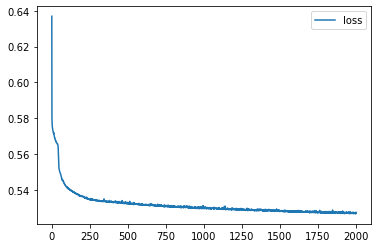

In [38]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

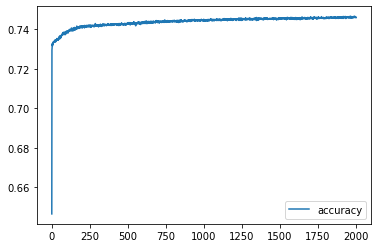

In [39]:
# Plot the loss
history_df.plot(y="accuracy")

# trying a logistic regression model

In [40]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.467


this did not work well at all

# random Forest classifier model

In [41]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.708
